In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_good.csv',names=["X", "Y"])

In [ ]:
df.head()

,X,Y
0,1047.02,53.51
1,1083.12,52.96
2,1090.55,47.18
3,1106.09,65.03
4,1116.80,65.15


In [ ]:
df=df[:-100]

In [ ]:
df.shape

(1161, 2)

In [ ]:
x_min = -26.0
x_max =1332
y_max =822
y_min =23
c=0
k=0
for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    c=c+1
    # df.loc[index,'status']= 'out'
    df.loc[index,'status']= 1
    df.loc[index,'elapased_time']= c
    # print('looked away')
    k=0
  else:
    k=k+1
    # df.loc[index,'status']= 'in'
    df.loc[index,'status']= 0
    df.loc[index,'elapased_time']=k
    # if (c!=0):
    #   print (c)
    #   df.loc[index-1,'away_time']=c
    c=0

In [ ]:
df[20:40]

,X,Y,status,elapased_time
20,641.13,208.76,in,21.0
21,677.66,206.77,in,22.0
22,633.04,274.93,in,23.0
23,500.58,481.07,in,24.0
24,454.11,494.53,in,25.0
25,535.70,472.05,in,26.0
26,631.20,445.12,in,27.0
27,621.74,356.80,in,28.0
28,661.49,312.76,in,29.0
29,648.29,284.37,in,30.0


In [ ]:
from sklearn.svm import OneClassSVM

# svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)
svm = OneClassSVM(kernel='linear', gamma=0.01)
print(svm)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01, kernel='linear',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)


In [ ]:
svm.fit(df)
pred = svm.predict(df)

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = ['precision', 'recall']
# gammas = np.logspace(-9, 3, 13)
# nus = np.linspace(0.01, 0.99, 99)
# param_grid = {'gamma':gammas,
#               'nu':nus} 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                 'nu': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                {'kernel': ['linear'], 'nu': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
               ] 

for score in scores:
    clf = GridSearchCV(OneClassSVM(), tuned_parameters, cv=10,
                           scoring='%s_macro' % score, return_train_score=True)

    clf.fit(df[['X','Y']], df[['status']])

    resultDf = pd.DataFrame(clf.cv_results_)
    print(resultDf[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False).head())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
# {'kernel': 'linear', 'nu': 0.001}

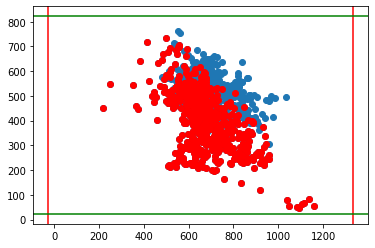

In [ ]:
from numpy import where

anom_index = where(pred==-1)
values = df.loc[anom_index]

plt.scatter(df.iloc[:,0], df.iloc[:,1])
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')

plt.axvline(x=x_min,color='red')
plt.axvline(x=x_max,color='red')
plt.axhline(y=y_min,color='green')
plt.axhline(y=y_max,color='green')

plt.show()

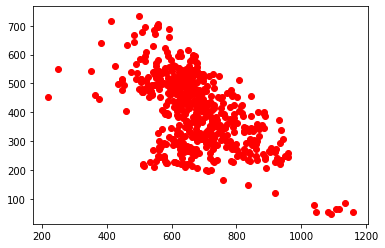

In [ ]:
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')
plt.show()

In [ ]:
values.shape

(399, 4)

In [ ]:
values[:20]

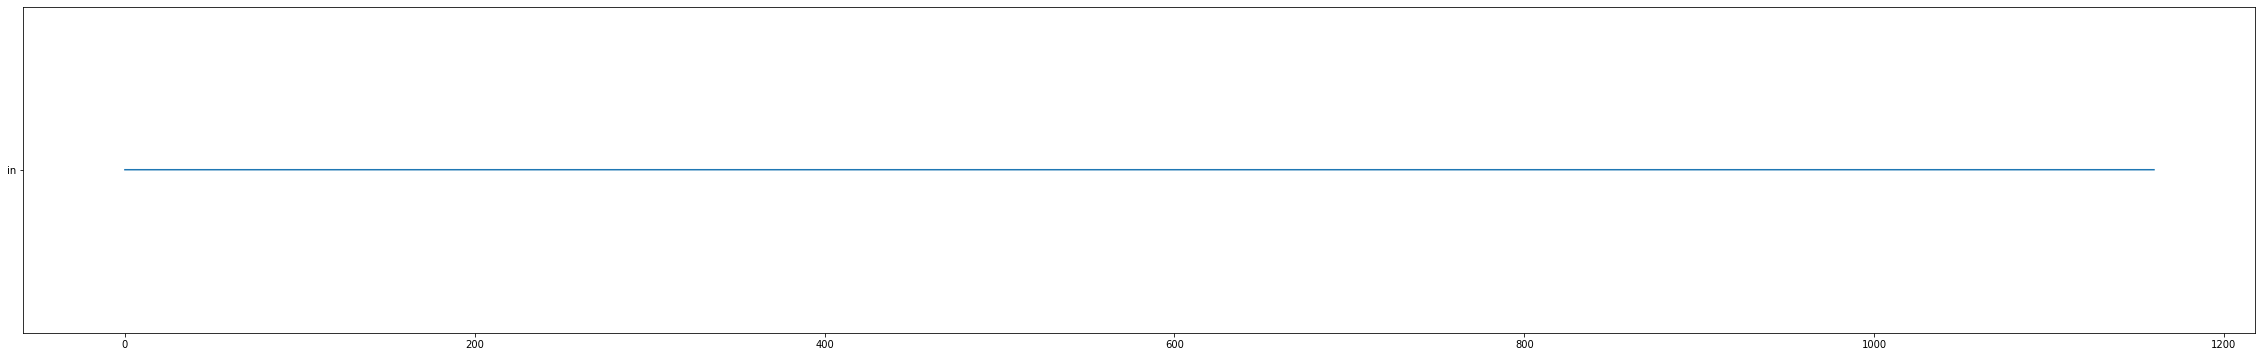

In [ ]:
plt.figure(figsize=(40, 6))
# plt.xticks(np.arange(min(out_screen_data['away_time']), max(out_screen_data['away_time'])+1, 1.0))
plt.plot(df.index,df['status'])

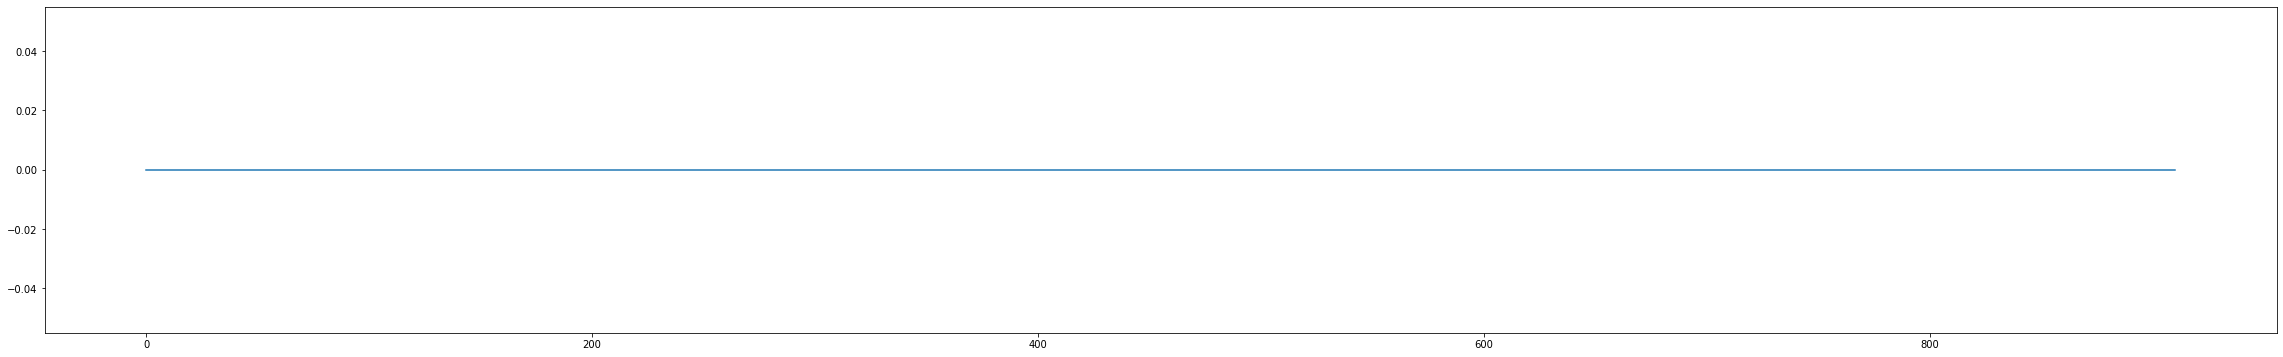

In [ ]:
plt.figure(figsize=(40, 6))
plt.plot(values.index,values['status'])

In [ ]:
df = df.dropna()

In [ ]:
on_screen_data = df.loc[df['away_time'] == 0.0]
on_screen_data.shape

(1776, 4)

In [ ]:
out_screen_data = df.loc[df['away_time'] != 0.0]
out_screen_data.shape

(896, 4)

In [ ]:
out_screen_data

,X,Y,status,away_time
4,1156.82,3.47,1.0,1.0
5,1151.26,23.67,1.0,2.0
24,-99.17,346.55,1.0,1.0
25,-137.46,326.96,1.0,2.0
26,-153.67,257.89,1.0,3.0
...,...,...,...,...
2659,1223.50,6.68,1.0,5.0
2660,1311.58,3.77,1.0,6.0
2661,1333.89,7.67,1.0,7.0
2662,1338.59,24.01,1.0,8.0


In [ ]:
out_screen_data['away_time'].value_counts()

1.0     89
2.0     74
3.0     61
4.0     55
5.0     55
        ..
43.0     2
42.0     2
67.0     2
69.0     1
70.0     1
Name: away_time, Length: 70, dtype: int64

# Cheating case

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/Test New/gazeData.csv',names=["X", "Y"])
# df=df[:-5]
# x_min = 17
# x_max =1485
# y_max =860
# y_min =6

In [ ]:
# df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_cheat1.csv',names=["X", "Y"])
# df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/Test New/gazeData.csv',names=["X", "Y"])
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_cheat.csv',names=["X", "Y"])
# df=df[:-5]

In [ ]:
df.head()

,X,Y
0,1082.11,87.00
1,1105.74,108.44
2,1144.39,93.47
3,1165.81,98.58
4,1176.48,112.02


In [ ]:

# x_min = -26 
# x_max =1332
# y_max =822
# y_min =23
# x_min = -6
# x_max =1505
# y_max =839
# y_min =27 
# x_min = 17
# x_max =1485
# y_max =860
# y_min =6
x_min = -6
x_max =1505
y_max =839
y_min =27
for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    df.loc[index,'status']= 1
  else:
    df.loc[index,'status']= 0
df.head(4)

,X,Y,status
0,1082.11,87.00,0.0
1,1105.74,108.44,0.0
2,1144.39,93.47,0.0
3,1165.81,98.58,0.0


In [ ]:
df= df.iloc[:1500]
df.head()

,X,Y,status
0,1267.25,-32.63,1.0
1,1309.90,-19.52,1.0
2,1322.64,-11.06,1.0
3,1342.33,-6.58,1.0
4,1311.62,17.38,1.0


In [ ]:
data = {'status': [], 'elapased_time': []}
df_new = pd.DataFrame(data)
c=0
status = 0
for index, row in df.iterrows():
  if (row['status'] == status):
    c=c+1
  else:
    # print(status,c)
    df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
    c=1
    status=row['status']
    # status=df.iloc[index,2]
df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
new_dtypes = {"status": int, "elapased_time": int}
df_new = df_new.astype(new_dtypes)
df_new.head()

,status,elapased_time
0,0,212
1,1,1
2,0,1
3,1,18
4,0,1


In [ ]:
df_new=df_new.iloc[1:]
df_new.head()

,status,elapased_time
1,1,25
2,0,171
3,1,2
4,0,431
5,1,24


In [ ]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# df[:-11]

In [ ]:
# df_new['elapased_time'].sum()

In [ ]:
# cheat
# x_min = -26.0
# x_max =1332
# y_max =822
# y_min =23
# cheat1
c=0
k=0
for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    c=c+1
    df.loc[index,'status']= 1
    df.loc[index,'elapased_time']= c
    # print('looked away')
    k=0
  else:
    k=k+1
    # df.loc[index,'status']= 'in'
    df.loc[index,'status']= 0
    df.loc[index,'elapased_time']=k
    # if (c!=0):
    #   print (c)
    #   df.loc[index-1,'away_time']=c
    c=0

In [ ]:
# df.iloc[205:220]/

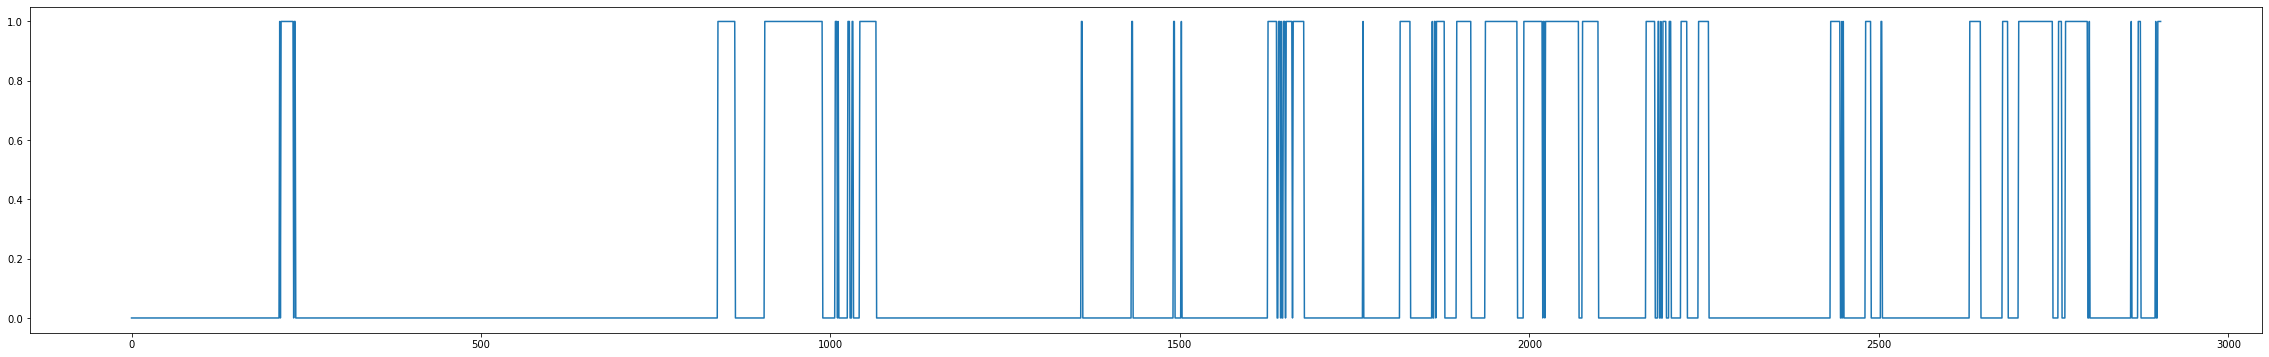

In [ ]:
plt.figure(figsize=(40, 6))
plt.plot(df.index,df['status'])

In [ ]:
# df['index_col'] = df.index
# x = df[['index_col','status']]
# x.head()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM

scores = ['precision', 'recall']
# gammas = np.logspace(-9, 3, 13)
# nus = np.linspace(0.01, 0.99, 99)
# param_grid = {'gamma':gammas,
#               'nu':nus} 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                 'nu': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                {'kernel': ['linear'], 'nu': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
               ] 

for score in scores:
    clf = GridSearchCV(OneClassSVM(), tuned_parameters, cv=10,
                           scoring='%s_macro' % score, return_train_score=True)

    clf.fit(df_new[['status']], df_new[['elapased_time']])

    resultDf = pd.DataFrame(clf.cv_results_)
    print(resultDf[["mean_test_score", "std_test_score", "params"]].sort_values(by=["mean_test_score"], ascending=False).head())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)

In [ ]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.1)
# svm = OneClassSVM(kernel='linear', gamma=0.01)

svm.fit(df_new)
pred = svm.predict(df_new)


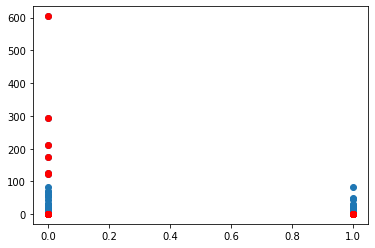

In [ ]:
from numpy import where

anom_index = where(pred==-1)
df_new = df_new.reset_index(drop=True) 
values = df_new.loc[anom_index]

plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')

# plt.axvline(x=x_min,color='red')
# plt.axvline(x=x_max,color='red')
# plt.axhline(y=y_min,color='green')
# plt.axhline(y=y_max,color='green')

plt.show()

In [ ]:
values

,status,elapased_time
7,1,27
12,0,281


In [ ]:
df_new['svm_p']=pred
df_new['cum_sum'] = df_new['elapased_time'].cumsum(axis = 0)

In [ ]:
df_new.head(40)

In [ ]:
data = {'status': [], 'elapased_time': []}
results = pd.DataFrame(data)
t1=0
t2=0
for index, row in df_new.iterrows():
  if (row['svm_p']== -1 and row['status']==0):
    if t2!=0:
      # cheat
      results=results.append({'status':'cheat','elapased_time':t2},ignore_index=True)
    t2=0
    t1=t1+row['elapased_time']
  else:
    if t1!=0:
      # non-cheat
      results=results.append({'status':'non-cheat','elapased_time':t1},ignore_index=True)
    t1=0
    t2=t2+row['elapased_time']

results.head(25)
    

,status,elapased_time
0,cheat,116.0
1,non-cheat,921.0
2,cheat,1.0
3,non-cheat,86.0
4,cheat,14.0
5,non-cheat,67.0
6,cheat,1388.0
7,non-cheat,39.0


In [ ]:
nc_median = results.loc[results['status']  == 'non-cheat']['elapased_time'].sum(axis=0)
nc_median

1506.0

In [ ]:
c_median = results.loc[results['status']  == 'cheat']['elapased_time'].sum(axis=0)
c_median

1124.0

In [ ]:
nc_count = results.loc[results['status']  == 'non-cheat'].shape[0]  
c_count =  results.loc[results['status']  == 'cheat'].shape[0]  

In [ ]:
nc_median*nc_count/(nc_median*nc_count+ c_median*c_count)

0.5959595959595959

In [ ]:
c_median*c_count/(nc_median*nc_count+ c_median*c_count)

0.40404040404040403

In [ ]:
# df_for_graph = df_new.loc[df_new['svm_p'] == -1]

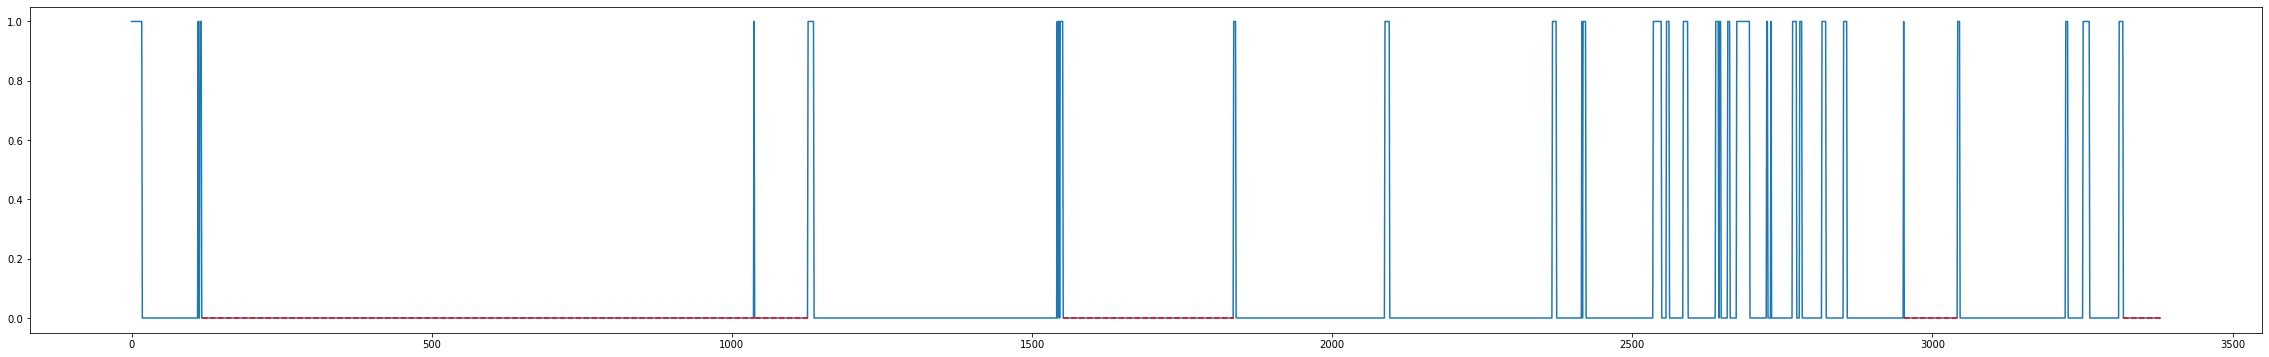

In [ ]:
plt.figure(figsize=(40, 6))
plt.plot(df.index,df['status'])

for index, row in df_new.iterrows():
  if row['svm_p'] == -1:
    plt.plot([row['cum_sum']-row['elapased_time'],row['cum_sum']],[row['status'],row['status']],c='r',linestyle="--")

In [ ]:
plt.figure(figsize=(150, 6))
plt.plot(df.index,df['status'])
plt.scatter(df_for_graph['cum_sum'],df_for_graph['svm_p']+1,c='r')
# index 

In [ ]:
values['status'].value_counts()

0.0    768
1.0    249
Name: status, dtype: int64

In [ ]:
values['elapased_time'].value_counts()

1.0      49
3.0      35
2.0      34
6.0      29
4.0      27
         ..
396.0     1
372.0     1
364.0     1
360.0     1
291.0     1
Name: elapased_time, Length: 296, dtype: int64

In [ ]:
df['status'].value_counts()

0.0    2217
1.0     687
Name: status, dtype: int64

## Normal case - but think, look time , non cheating but looking away

In [ ]:
df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Test Data/webquiz_normal.csv',names=["X", "Y"])

NameError: ignored

In [ ]:
x_min = 49
x_max =1399
y_max =817
y_min =65
# x_min = -75
# x_max =1515
# y_max =805
# y_min =-23
for index, row in df.iterrows():
  if (row['X']>x_max or row['X']<x_min or row['Y']>y_max or row['Y']<y_min):
    df.loc[index,'status']= 1
  else:
    df.loc[index,'status']= 0
df.head()

,X,Y,status
0,1246.60,9.00,1.0
1,1179.46,8.46,1.0
2,1164.74,41.40,1.0
3,1198.35,59.96,1.0
4,1202.71,51.11,1.0


In [ ]:
df= df.iloc[:1000]
df.head()
# df = df.iloc[100:]

,X,Y,status
0,1246.60,9.00,1.0
1,1179.46,8.46,1.0
2,1164.74,41.40,1.0
3,1198.35,59.96,1.0
4,1202.71,51.11,1.0


In [ ]:
df = df.iloc[:-200]

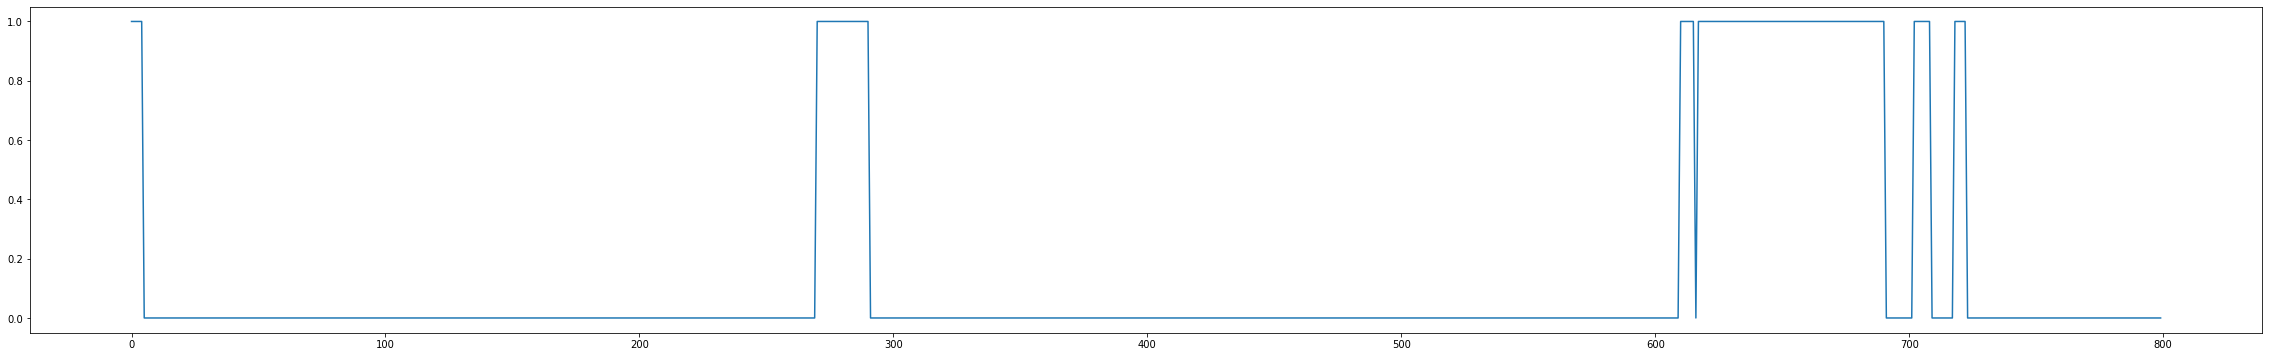

In [ ]:
plt.figure(figsize=(40, 6))
plt.plot(df.index,df['status'])

* first out -  Looked time 
* second out - thinking
* third out - looking away from the window



In [ ]:
data = {'status': [], 'elapased_time': []}
df_new = pd.DataFrame(data)
c=0
status = 0
for index, row in df.iterrows():
  if (df.iloc[index,2] == status):
    c=c+1
  else:
    # print(status,c)
    df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
    c=1
    status=df.iloc[index,2]
df_new=df_new.append({'status':status,'elapased_time':c},ignore_index=True)
new_dtypes = {"status": int, "elapased_time": int}
df_new = df_new.astype(new_dtypes)
df_new.head(10)

,status,elapased_time
0,0,0
1,1,5
2,0,265
3,1,21
4,0,319
5,1,6
6,0,1
7,1,74
8,0,11
9,1,7


In [ ]:
df_new=df_new.iloc[1:]

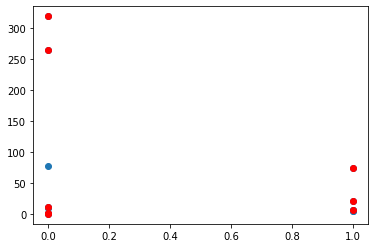

In [ ]:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.001)
svm.fit(df_new)
pred = svm.predict(df_new)

from numpy import where

anom_index = where(pred==-1)
values = df_new.loc[anom_index]

plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1])
plt.scatter(values.iloc[:,0], values.iloc[:,1], color='r')

plt.show()

In [ ]:
values

,status,elapased_time,svm_p,cum_sum
0,0,0,1,0
2,0,265,1,270
3,1,21,1,291
4,0,319,-1,610
5,1,6,1,616
6,0,1,1,617
7,1,74,-1,691
8,0,11,1,702


In [ ]:
df_new['svm_p']=pred
df_new['cum_sum'] = df_new['elapased_time'].cumsum(axis = 0)
df_new.head()

,status,elapased_time,svm_p,cum_sum
0,0,0,-1,0
1,1,5,1,5
2,0,265,-1,270
3,1,21,-1,291
4,0,319,-1,610


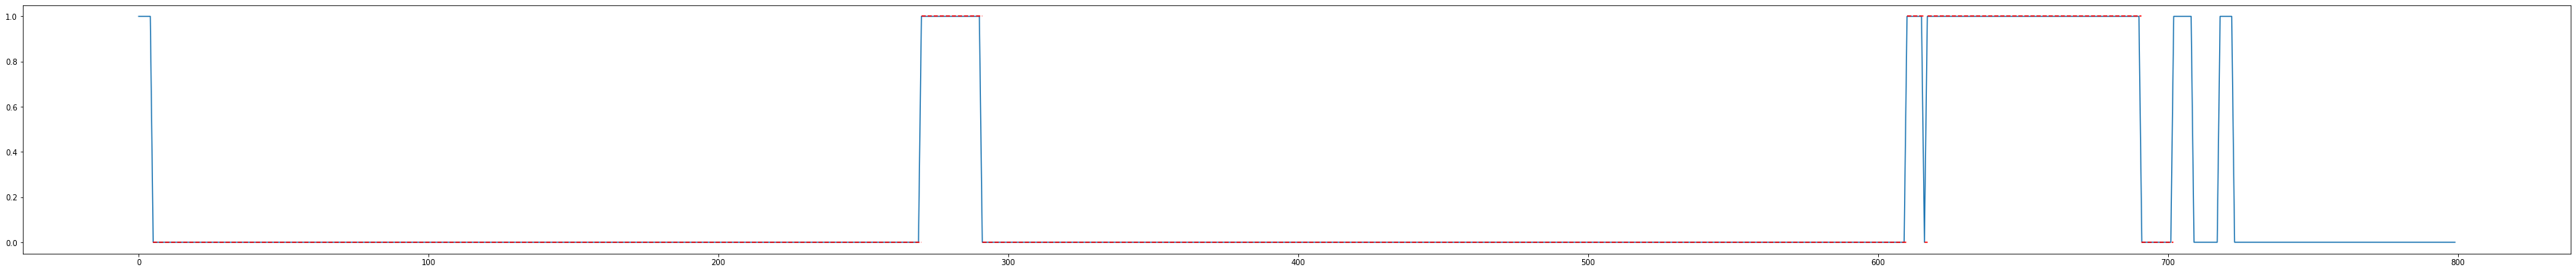

In [ ]:
plt.figure(figsize=(60, 6))
plt.plot(df.index,df['status'])

for index, row in df_new.iterrows():
  if row['svm_p'] == -1:
    plt.plot([row['cum_sum']-row['elapased_time'],row['cum_sum']],[row['status'],row['status']],c='r',linestyle="--")